#To Explore the Decision Tree Algorithm

In [ ]:
# Importing libraries in Python
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

#Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

##Loading the Dataset

In [ ]:
iris = datasets.load_iris()

In [ ]:
df=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

Creating a new column “Species” with target values from the dataset, I am using lambda function to apply a function so as to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”)

In [ ]:
df['Species']=iris['target']

In [ ]:
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])

In [ ]:
df.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


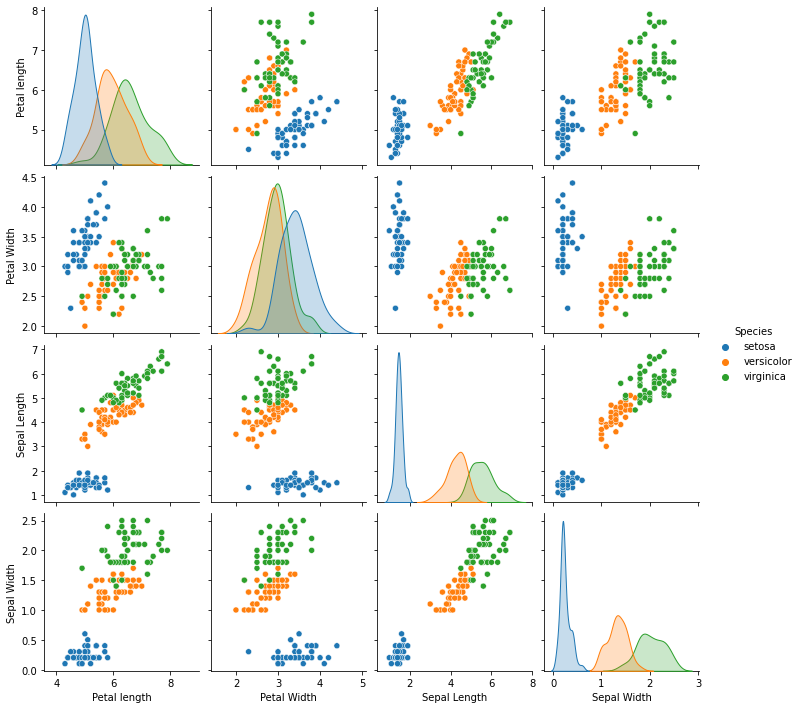

In [13]:
sns.pairplot(df, hue = 'Species')
plt.show()

##Checking Correlation using Heatmap

[]

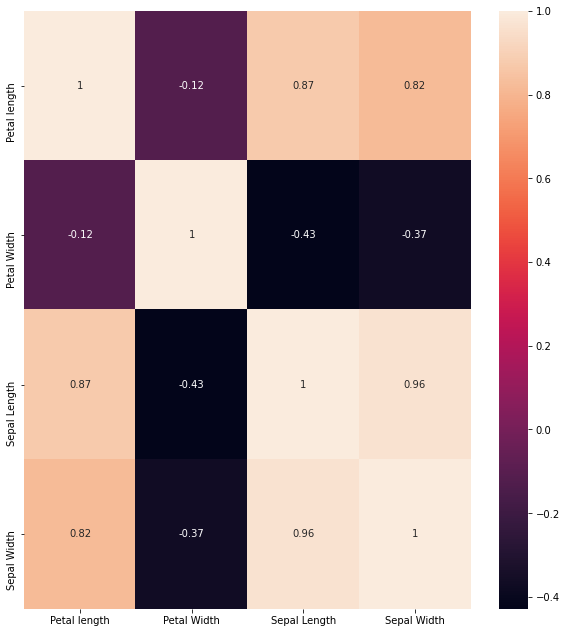

In [15]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Observations -

<ol type=a>
<li>Petal length is highly related to petal width.</li>
<li>Sepal lenth is not related sepal width.</li>

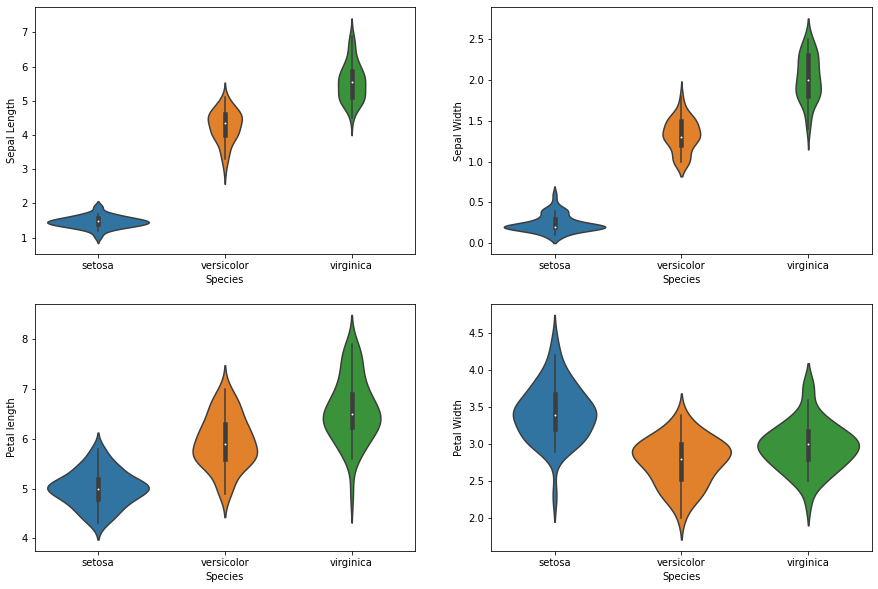

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="Sepal Length",data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="Sepal Width",data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="Petal length",data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="Petal Width",data=df)

##Preparing the data for Modelling

In [18]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.3,random_state=24)

In [19]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [21]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

In [22]:
DTree = DecisionTreeClassifier(random_state=12)
model = DTree.fit(train_X, train_y)

In [24]:
DTree.predict(test_X)

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor'], dtype=object)

##Checking accuracy of model

In [25]:
DTree.score(test_X, test_y)

0.9777777777777777

In [27]:
#prediction
y_pred = DTree.predict(test_X)

In [33]:
#Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(test_y, y_pred))

Accuracy Score: 0.9777777777777777


##Visualize the Decision Tree to understand it better.

In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


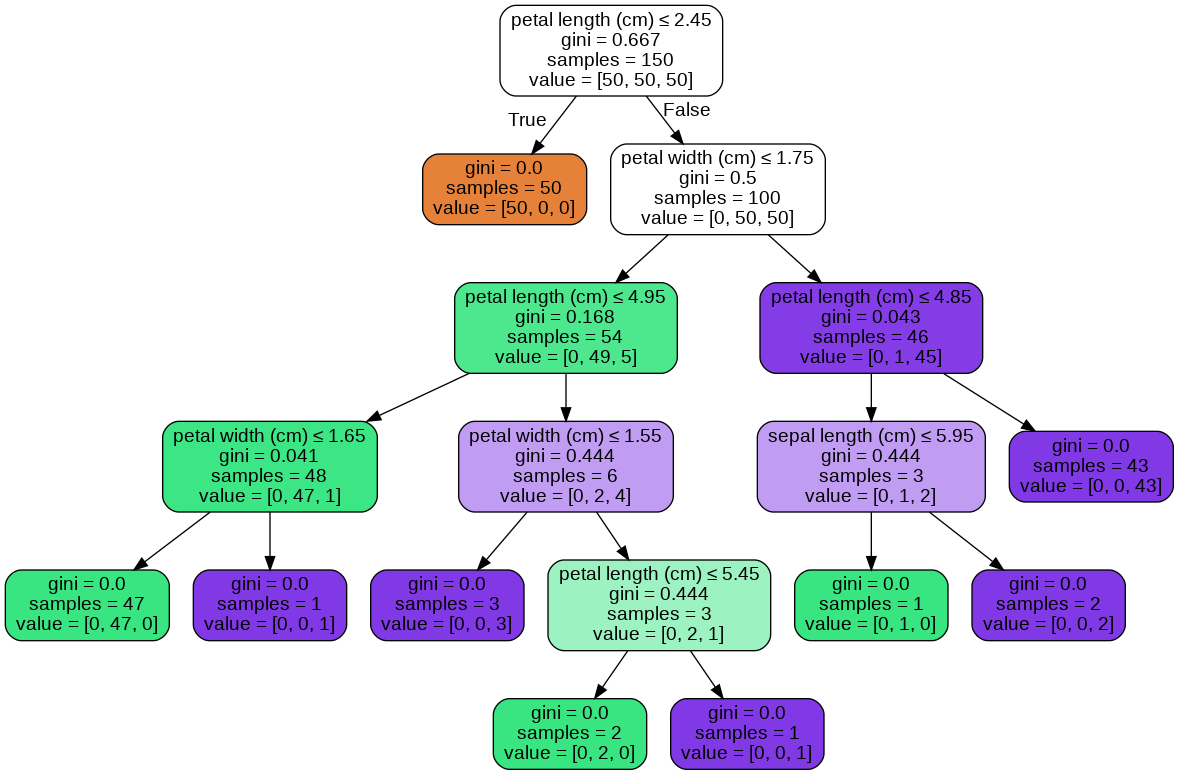

In [ ]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##Feeding Test data in the classifier to predict right class accordingly

In [35]:
DTree.predict([[3, 2.9, 4.2, 1.4]])

array(['virginica'], dtype=object)

In [37]:
DTree.predict([[3.6, 1.5, 2.6, 4.9]])

array(['versicolor'], dtype=object)